# SOK-1006 V23
## Forelesning 1 - Enkel bruk av Python i mikroøkonomisk analyse

### 1. Definer og tegn en funksjon
Her skal vi definere en funksjon $y=f(x,a)$ hvor $a$ er en parameter som forteller oss om forholdet mellom input $x$ og output $y$. La oss ta eksempelet $y=x^a$, som vi har lyst å tegne.

In [1]:
# import pakkene som vi trenger for å tegne en figur
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# definer funksjonen
def fn(x,a):
    return x**a

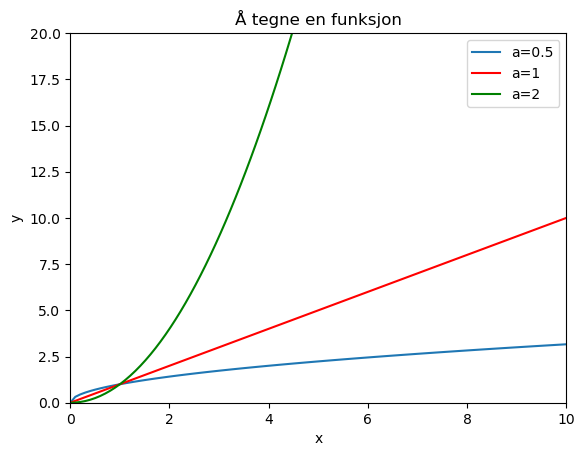

In [3]:
# tegn funksjonen

# først lager vi vår x variabel 0-10
x = np.linspace(0,10,100)


fig,ax=plt.subplots()

ax.set_ylabel('y')
ax.set_xlabel('x')

# tegn funksjonen for forskjellige verdier på a
# a=0.5, 1 og 2

ax.plot(x,fn(x, 0.5),label='a=0.5')
ax.plot(x,fn(x, 1), color="red", label='a=1')
ax.plot(x,fn(x, 2), color="green", label='a=2')

# Vi kan begrense aksene om vi vil 

ax.set(xlim=(0,10))
ax.set(ylim=(0,20))

# gi en passende tittel

ax.set_title('Å tegne en funksjon')

#legend:
ax.legend(loc='upper right')


plt.show()


Vi kan også tegne figurene ved siden av hverandre.


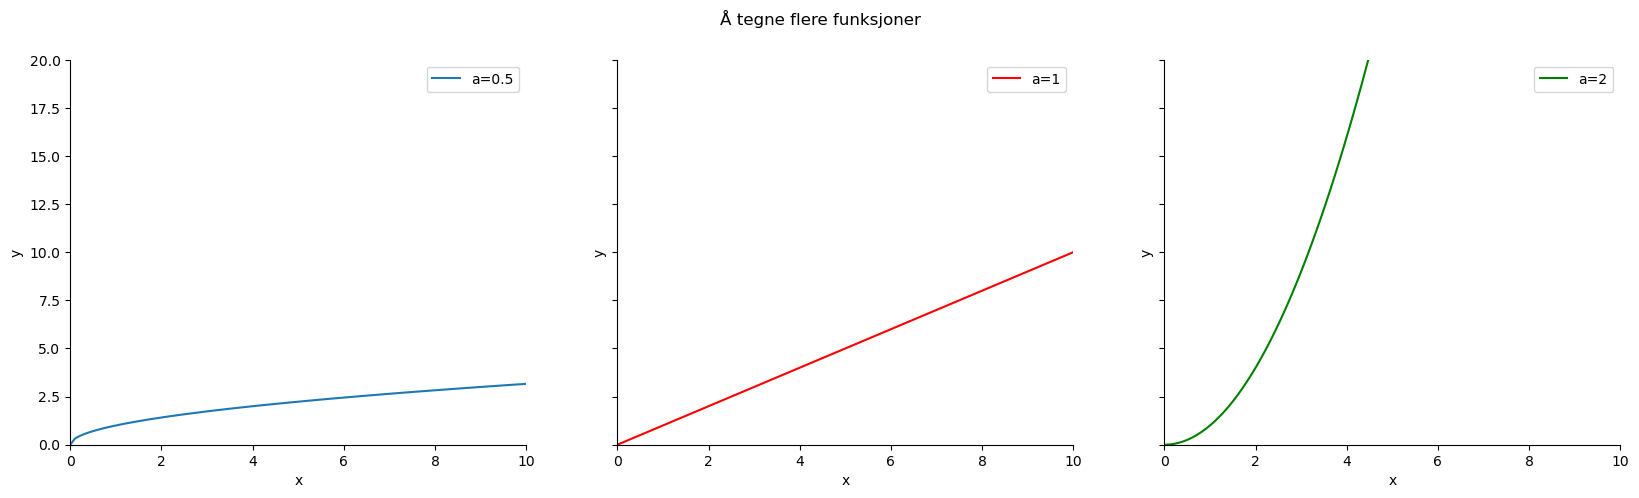

In [4]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(20,5))

ax1.set_ylabel('y')
ax1.set_xlabel('x')

ax2.set_ylabel('y')
ax2.set_xlabel('x')

ax3.set_ylabel('y')
ax3.set_xlabel('x')

# tegn funksjonen for forskjellige verdier på a
# a=0.5, 1 og 2

ax1.plot(x,fn(x, 0.5),label='a=0.5')
ax2.plot(x,fn(x, 1), color="red", label='a=1')
ax3.plot(x,fn(x, 2), color="green", label='a=2')

# Begrense aksene og start fra (0,0)


ax1.set(xlim=(0,10),ylim=(0,20))

ax2.set(xlim=(0,10),ylim=(0,20))

ax3.set(xlim=(0,10),ylim=(0,20))

# Vi tar bort linjene øverst og til høyre

ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')

ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')

ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')

# gi en passende tittel

fig.suptitle('Å tegne flere funksjoner')

#legend:
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')


plt.show()

La oss gjøre det samme ved hjelp av en løkke istedenfor manuelt.

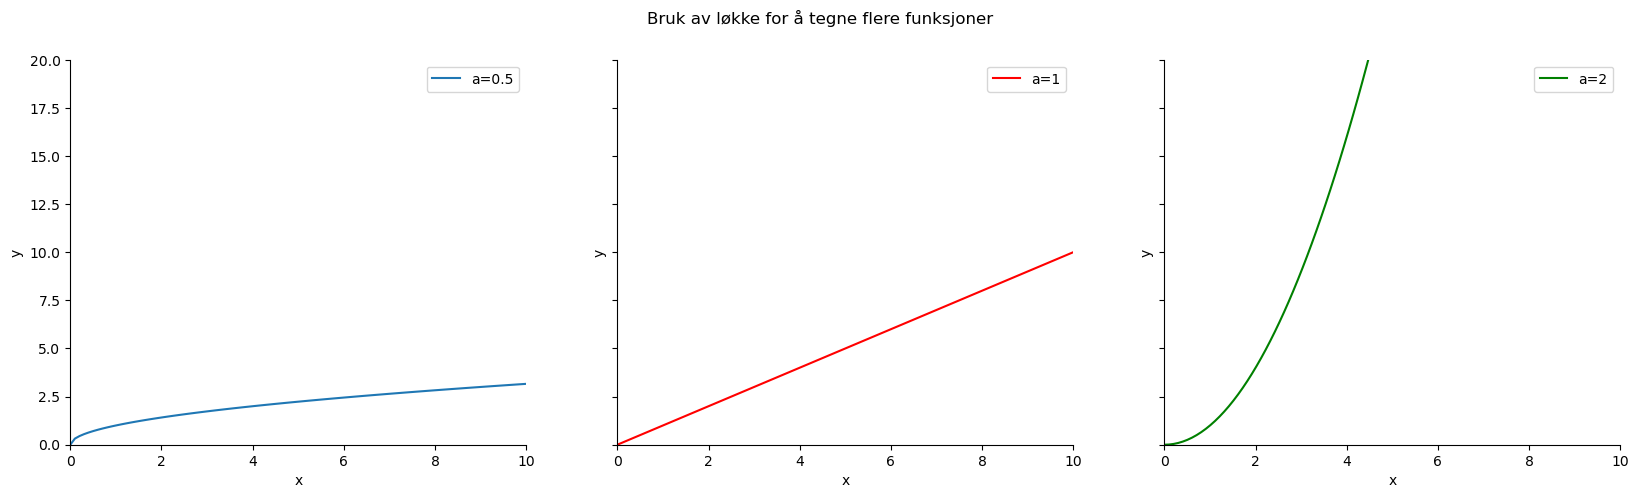

In [5]:
# bruk axs for å definere aksene

fig, axs = plt.subplots(1,3, sharey=True, figsize=(20,5))

# plott av linjene

axs[0].plot(x,fn(x, 0.5),label='a=0.5')
axs[1].plot(x,fn(x, 1), color="red", label='a=1')
axs[2].plot(x,fn(x, 2), color="green", label='a=2')

# bruk løkke for å tegne aksene

for i in range(3):

    axs[i].set_ylabel('y')
    axs[i].set_xlabel('x')
    axs[i].set(xlim=(0,10),ylim=(0,20))
    axs[i].spines['top'].set_color('none')
    axs[i].spines['right'].set_color('none')
    axs[i].legend(loc='best')

# gi en passende tittel

fig.suptitle('Bruk av løkke for å tegne flere funksjoner')

plt.show()

### 2. Derivasjon og likningsløsning
Vi kan derivere med hjelp av Sympy. La oss fortsette med eksempelet $y=x^a$ som vi har allerede definert. Vi importerer pakken og så definerer symbolene som vi trenger.

In [6]:
from sympy import *

# spesifiser bokstavene som vi kommer til å bruke
x, y,a = symbols('x y a', positive=True, real=True)

# deriver mhp x

diff(fn(x,a), x)


a*x**a/x

Vi ser at denne deriverten ikke blir gjengitt på enklest måte. Vi kan bruke simplify() her:

In [7]:
simplify(diff(fn(x,a), x))

a*x**(a - 1)

In [8]:
# vi kan også derivere mhp a
simplify(diff(fn(x,a), a))

x**a*log(x)

La oss sette opp en profittfunksjon med pris p og grensekostnad c per enhet. Funksjonen fn(x,a) er produktfunksjonen.

In [9]:
# definer nye symboler
p, c = symbols('p, c', positive=True, real=True)
# definer uttrykket:

profitt = p*fn(x,a) - c*x

# deriver mhp x
d_prof_1=diff(profitt, x)

display (d_prof_1)

a*p*x**a/x - c

In [10]:
# Sett opp førsteordensbetingelsen

foc=Eq(d_prof_1,0)
foc


Eq(a*p*x**a/x - c, 0)

In [11]:
# Løs foc

opt_x = solve(foc, x)[0]
opt_x


(c/(a*p))**(1/(a - 1))

Da har vi at mengden som løser førsteordensbetingelsen er $x= \left( \frac{c}{ap} \right)^\frac{1}{a-1}$. Vi må sjekke at dette er et maximumspunkt ved å beregne den andrederiverte som må være negativ.

In [12]:
d_prof_2=diff(profitt, x, 2)
d_prof_2

a*p*x**a*(a - 1)/x**2

In [13]:
solve (d_prof_2 <0, a)

a < 1

For å oppnå et maksimum må vi ha $a < 1$. Gitt at dette er oppfylt er optimal produksjon $x= \left( \frac{c}{ap} \right)^\frac{1}{a-1}$. Dette gir maksmimal profitt på

In [14]:
maks_profitt = (profitt.subs(x, opt_x))
maks_profitt

-c*(c/(a*p))**(1/(a - 1)) + p*((c/(a*p))**(1/(a - 1)))**a

### 3. Løse likningssystem
La oss løse to likninger med to ukjente. Tenk at vi har to likninger $(1) p= 10-0.5x, (2) p=2+x.$ La oss sette opp disse likningene og løse for x og p.

In [15]:
eq_1=Eq(10-0.5*x, p)
eq_2=Eq(2+x, p)

solve ((eq_1, eq_2), (p,x))

{p: 7.33333333333333, x: 5.33333333333333}

Løsningen her er en dictionary.